In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("letter-recognition.csv", sep = ",")
df=df.iloc[:,1:]
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1 : 17]
y = df.select_dtypes(include = [object])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
!pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 1.5 MB/s eta 0:00:000:00:010:00:01:01


In [6]:
#!pip install yellowbrick
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ConfusionMatrix

In [7]:
mlp = MLPClassifier(hidden_layer_sizes = (250, 300), max_iter = 1000000, activation = 'logistic')

In [8]:
cm = ConfusionMatrix(mlp, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

ConfusionMatrix(ax=<Axes: >,
                classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
                         'W', 'X', 'Y', 'Z'],
                cmap=<matplotlib.colors.ListedColormap object at 0x7ff563986da0>,
                estimator=MLPClassifier(activation='logistic',
                                        hidden_layer_sizes=(250, 300),
                                        max_iter=1000000))

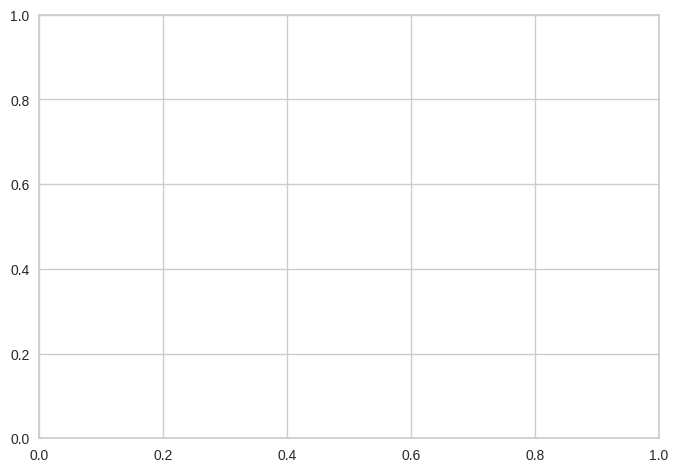

In [9]:
cm.fit(X_train, y_train.values.ravel())

In [10]:
cm.score(X_test, y_test)

/home/ksr/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9025

In [11]:
predictions = cm.predict(X_test)
print(predictions)

['C' 'F' 'Q' 'T' 'L' 'G' 'L' 'A' 'P' 'E' 'W' 'Q' 'S' 'G' 'U' 'B' 'S' 'A'
 'N' 'T' 'D' 'L' 'Z' 'D' 'O' 'J' 'C' 'H' 'G' 'C' 'H' 'W' 'D' 'O' 'J' 'O'
 'H' 'Z' 'P' 'N' 'G' 'X' 'O' 'G' 'O' 'D' 'M' 'I' 'V' 'Y' 'Y' 'U' 'D' 'U'
 'V' 'V' 'U' 'H' 'Q' 'E' 'M' 'F' 'B' 'P' 'I' 'F' 'G' 'D' 'D' 'C' 'H' 'O'
 'X' 'O' 'P' 'Z' 'N' 'Q' 'K' 'M' 'Y' 'T' 'X' 'O' 'R' 'Y' 'V' 'Z' 'Y' 'W'
 'T' 'N' 'I' 'Z' 'W' 'A' 'B' 'G' 'D' 'L' 'V' 'C' 'B' 'Z' 'C' 'U' 'I' 'U'
 'V' 'Q' 'M' 'N' 'F' 'M' 'M' 'D' 'E' 'N' 'Y' 'D' 'L' 'C' 'E' 'Q' 'E' 'O'
 'O' 'M' 'L' 'A' 'C' 'O' 'F' 'J' 'V' 'G' 'J' 'U' 'K' 'V' 'E' 'M' 'L' 'Q'
 'U' 'V' 'W' 'Y' 'V' 'T' 'B' 'Z' 'L' 'B' 'X' 'Y' 'F' 'G' 'J' 'B' 'H' 'E'
 'N' 'R' 'A' 'H' 'Z' 'B' 'F' 'A' 'D' 'D' 'F' 'K' 'E' 'L' 'K' 'K' 'H' 'M'
 'E' 'N' 'P' 'H' 'M' 'F' 'F' 'W' 'Z' 'N' 'M' 'P' 'T' 'A' 'F' 'H' 'W' 'O'
 'C' 'T' 'N' 'C' 'Q' 'E' 'G' 'T' 'J' 'B' 'Q' 'O' 'S' 'I' 'W' 'J' 'K' 'W'
 'O' 'J' 'L' 'K' 'G' 'A' 'X' 'W' 'V' 'X' 'Z' 'H' 'D' 'I' 'S' 'C' 'N' 'D'
 'Z' 'M' 'B' 'F' 'H' 'C' 'I' 'O' 'P' 'Y' 'S' 'M' 'L

In [12]:
print("Accuracy: ", accuracy_score(y_test, predictions))

Accuracy:  0.9025


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, digits=5))

              precision    recall  f1-score   support

           A    0.92308   0.92308   0.92308        13
           B    0.88889   0.94118   0.91429        17
           C    1.00000   0.88889   0.94118        18
           D    0.96154   0.86207   0.90909        29
           E    1.00000   0.77778   0.87500        18
           F    0.82353   0.87500   0.84848        16
           G    0.83333   0.88235   0.85714        17
           H    0.77778   0.82353   0.80000        17
           I    0.92857   0.92857   0.92857        14
           J    0.92857   0.92857   0.92857        14
           K    0.80000   1.00000   0.88889         8
           L    1.00000   1.00000   1.00000        18
           M    0.95238   1.00000   0.97561        20
           N    0.88235   0.93750   0.90909        16
           O    0.90000   0.85714   0.87805        21
           P    0.92308   1.00000   0.96000        12
           Q    0.93750   0.88235   0.90909        17
           R    0.87500   1